In [ ]:
import numpy as np
import pandas as pd
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
print('library imported ')

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir
## access data by internet

In [ ]:
path =r"C:\Users\Ranjit Singh\Desktop\upflairs\img_classification\datasets\flower_photos"
# dataset file path

In [ ]:
data_dr = pathlib.Path(path)
data_dr

# creating window file path

WindowsPath('C:/Users/Ranjit Singh/Desktop/upflairs/img_classification/datasets/flower_photos')

In [ ]:
for i in data_dr.iterdir():
    print(i)
# iterating all the directory

C:\Users\Ranjit Singh\Desktop\upflairs\img_classification\datasets\flower_photos\daisy
C:\Users\Ranjit Singh\Desktop\upflairs\img_classification\datasets\flower_photos\dandelion
C:\Users\Ranjit Singh\Desktop\upflairs\img_classification\datasets\flower_photos\LICENSE.txt
C:\Users\Ranjit Singh\Desktop\upflairs\img_classification\datasets\flower_photos\roses
C:\Users\Ranjit Singh\Desktop\upflairs\img_classification\datasets\flower_photos\sunflowers
C:\Users\Ranjit Singh\Desktop\upflairs\img_classification\datasets\flower_photos\tulips


In [ ]:
flower_dict ={
    'roses':list(data_dr.glob('roses/*')),
    'daisy':list(data_dr.glob('daisy/*')),
    'dandelion':list(data_dr.glob('dandelion/*')),
    'sunflowers':list(data_dr.glob('sunflowers/*')),
    'tulips':list(data_dr.glob('tulips/*'))
}

# preparing the dataset for training

In [ ]:
flower_label = {
     'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

#label encoding

In [ ]:
flower_dict['sunflowers'][0]
# fetching first element from the flower list of sunflower

WindowsPath('C:/Users/Ranjit Singh/Desktop/upflairs/img_classification/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

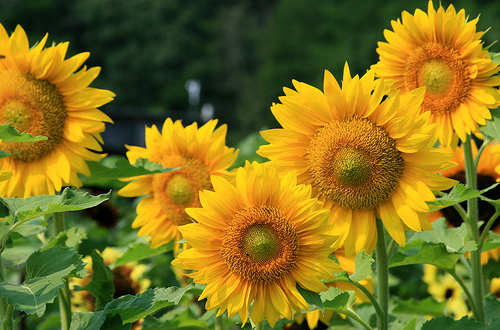

In [ ]:
Image.open(flower_dict['sunflowers'][0])
# visualaizing the image

In [ ]:
no_of_classes = len(flower_dict.items())
no_of_classes
# to check no. of classes

5

In [3]:
x,y = [],[]
for key , valu in flower_dict.items():
    for item in valu:
        img = cv2.imread(str(item))
        reduced_image = cv2.resize(img,(224,224))
        x.append(reduced_image)
        y.append(flower_label[key])

# # preparing the dataset in the form of x , and  y

In [ ]:
x = np.array(x)
y = np.array(y)
# convertin X and Y and list of data into numpy array

In [ ]:
x.shape,y.shape
# checking the shape

((3670, 224, 224, 3), (3670,))

In [ ]:
# train test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

# normalizing the images in between 0 to 1 range

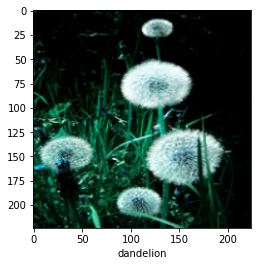

In [ ]:
     # these images are ready for the training
plt.imshow(x_train_scaled[52])
plt.xlabel([key for key , value in flower_label.items() if value == y_train[52]][0])
plt.show()

# image visualaization after scaling

In [ ]:
x_train.shape

(2752, 224, 224, 3)

In [ ]:
# Define the CNN architecture
model = Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 173056)           

In [ ]:
model.fit(x_train,y_train,epochs=1)

# training the model

86/86 [==============================] - 158s 2s/step - loss: 54.1987 - accuracy: 0.2366


In [ ]:
predictions = model.predict(x_test)

# getting the prediction

29/29 [==============================] - 15s 484ms/step


In [ ]:
predictions.shape     ,y_test.shape

((918, 5), (918,))

In [ ]:
predictions[0]

array([0.23457362, 0.1963347 , 0.19273873, 0.19734593, 0.17900701],
      dtype=float32)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
# to find the predicted classes

In [ ]:
predicted_classes

array([0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 1, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 3, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2,

In [ ]:
flower_label

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
list_of_labels = list(flower_label.keys())
list_of_labels

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [ ]:
# defining the function to get actual and predicted data point
# in the form of pandas dataframe, for better understanding

def make_prediction_list(predicted_classes,y_tes):
    actual = []
    pred = []

    # to get predicted label
    for preds in predicted_classes:
        pred.append(list_of_labels[preds])

    # to get actual labels
    for act in y_tes:
        actual.append(list_of_labels[act])

    pretty_df = pd.DataFrame({'actual_flowers':actual,'predicted_flower':pred})
    return pretty_df


In [ ]:
df = make_prediction_list(predicted_classes,y_test)
df.head(30)

,actual_flowers,predicted_flower
0,daisy,roses
1,roses,tulips
2,dandelion,dandelion
3,tulips,dandelion
4,dandelion,dandelion
5,sunflowers,dandelion
6,roses,dandelion
7,tulips,dandelion
8,sunflowers,dandelion
9,tulips,dandelion


## Thank you 🤍